# **Comparative Analysis of Machine Learning Algorithms for Customer Satisfaction Prediction**

**This research project aims to provide answers to the below 2 research questions**

1. Which Machine Learning Algorithm (Random Forest, Support Vector Machine (SVM), and XGBoost ) Provides the Most Accurate Prediction of Customer Satisfaction Levels?
2. What Are the Top 5 Key Factors Driving Customer Satisfaction, as identified by Predictive Models


# **Dataset Overview**

**This dataset contains 15 variables that capture various aspects of customer travel experiences and satisfaction. These variables fall into two main categories: 11 numerical variables and 4 categorical variables**

Variables:

Age: Range from 7 to 85.

Purpose of Travel: Includes categories such as aviation, academic, personal, business, and tourism.

Type of Travel: Either group travel or individual travel.

Type of Booking: Includes group bookings or individual/couple bookings.

Hotel Wi-Fi Service: Rated on a scale of 1 to 5.

Departure/Arrival Convenience: Rated on a scale of 1 to 5.

Ease of Online Booking: Rated on a scale of 1 to 5.

Hotel Location: Rated on a scale of 1 to 5.

Food and Drink Quality: Rated on a scale of 1 to 5.

Stay Comfort: Rated on a scale of 1 to 5.

Common Room Entertainment: Rated on a scale of 1 to 5.

Check-in/Check-out Service: Rated on a scale of 1 to 5.

Other Services: Rated on a scale of 1 to 5.

Cleanliness: Rated on a scale of 1 to 5.

Satisfaction: Overall customer satisfaction level, categorized as satisfied, neutral, or dissatisfied.


In [1]:
### Importing the libraries we need for this

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from imblearn import over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE



Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Reading in the data
df = pd.read_csv(r"C:\Users\USER\Desktop\Europe Hotel Booking Satisfaction Score.csv")

# Checking the top 5 rows
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [3]:
# Getting an overview of the data
df.info() # We have 103904 rows of data and 15 variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [4]:
# Checking if there is missing values
df.isnull().sum() # We have no missing values in the data

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [5]:
# Checking if we have duplicates
df.duplicated().sum()

# We have no duplicates

0

In [6]:
# Dropping the 'id' column as it's not needed for analysis
df.drop('id', axis=1, inplace=True)

# **Performing EDA**

Having Explored the data and gain understanding on it. I will now move on to perform Exploratory data analysis to gain analytical insights on the data. This will include Univariate analysis to understand the target variable and Bivariate and Multivariate analysis to understand the relationship between 2 variables and more respectively

#### **Univariate Analysis**

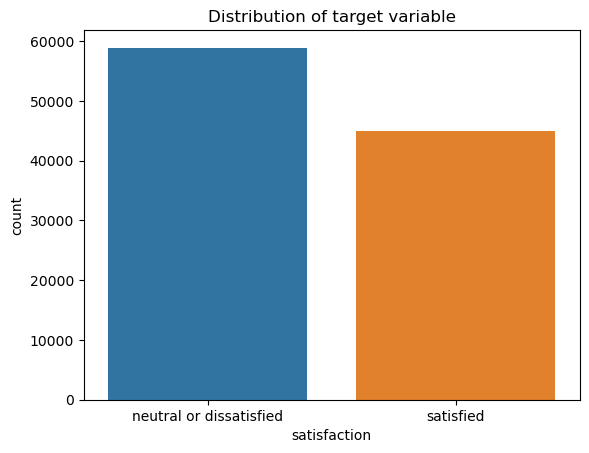

In [7]:
plt.style.use('default')
# Exploring the distribution of the target variable
sns.countplot(x='satisfaction', data=df)
plt.title("Distribution of target variable")
plt.show()



In [8]:
# Checking the ratio of the target distribution
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: satisfaction, dtype: float64

From the insight we can see that we are dealing with an imbalance data, with 56.6% of the data attributed to be neutral or dissatisfied and 43% attributed to be satisfied. This will be resolve later using the Smote technique

## **Bivariate Analysis**

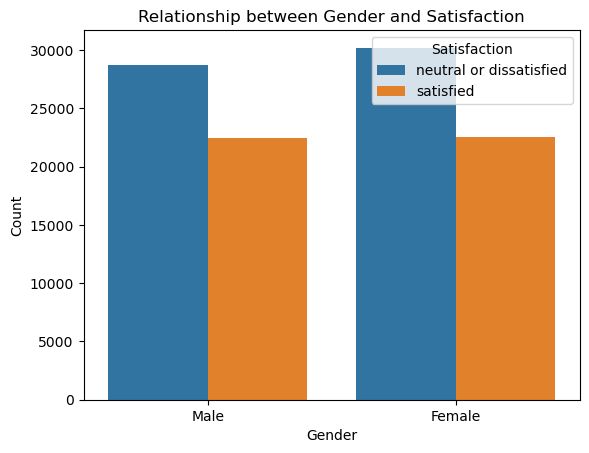

In [9]:
# Exploring the relationship between gender and satisfaction
sns.countplot(x='Gender', hue='satisfaction', data=df)
plt.title('Relationship between Gender and Satisfaction')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Satisfaction')


This above insights suggests that gender does not play a major role in satisfaction levels, as the patterns tends to be consistent across both male and female groups

<AxesSubplot:xlabel='satisfaction', ylabel='Age'>

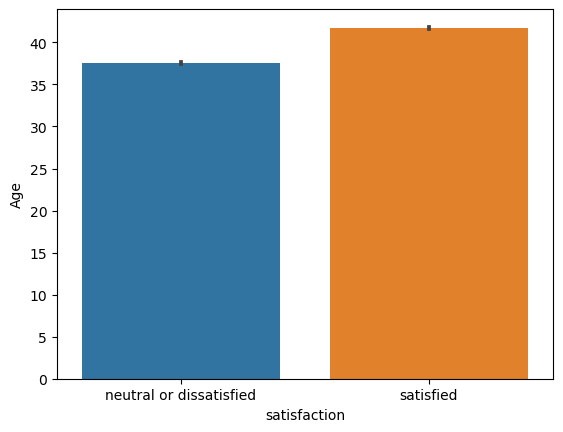

In [10]:
# Exploring the relationship between Age and satisfaction
sns.barplot(x='satisfaction', y='Age', data=df)

The average age of individuals who are satisfied appears to be slightly higher than those who are neutral or dissatisfied

<AxesSubplot:xlabel='purpose_of_travel', ylabel='count'>

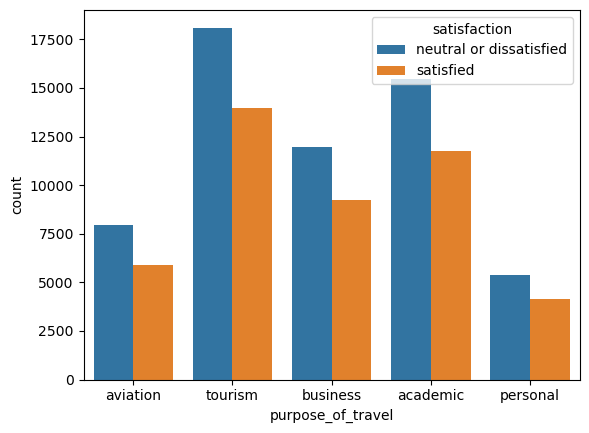

In [11]:
# Exploring the relationship between purpose of travel and satisfaction
sns.countplot(x='purpose_of_travel', hue='satisfaction', data=df)

The "tourism" and the "academic" category has the highest count of travelers overall, with a large portion of both "satisfied" and "neutral or dissatisfied" customers. 

Overall, the chart suggests that customer satisfaction varies significantly by the purpose of travel, with academic and tourism travelers showing higher levels of dissatisfaction.

<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

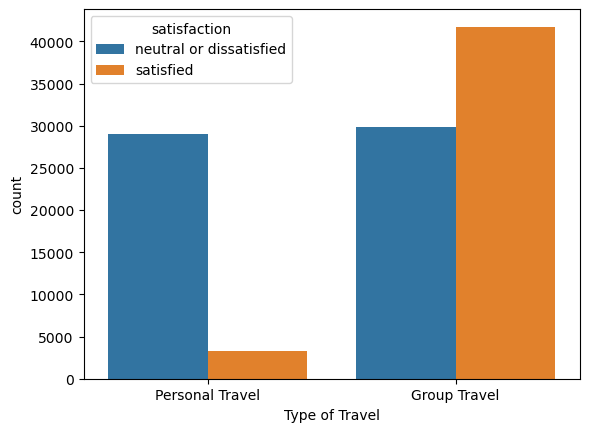

In [12]:
# Exploring the relationship between Type of Travel and satisfaction
sns.countplot(x='Type of Travel', hue='satisfaction', data=df)


There is a significantly higher count of "satisfied" travelers in the "Group Travel" category compared to "neutral or dissatisfied." This suggests that people traveling in groups tend to be more satisfied overall, which could be due to shared experiences or group-related benefits.

<AxesSubplot:xlabel='Type Of Booking', ylabel='count'>

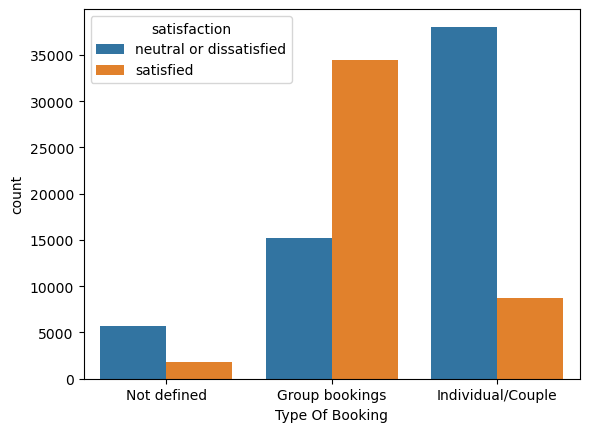

In [13]:
# Exploring the relationship between Type of Booking and satisfaction
sns.countplot(x='Type Of Booking', hue='satisfaction', data=df)

The "Group bookings" category has a higher count of "satisfied" customers compared to "neutral or dissatisfied," indicating that group bookings generally lead to higher customer satisfaction. This aligns with previous findings, where group-related travel tends to enhance the customer experience.

<AxesSubplot:xlabel='satisfaction', ylabel='Hotel wifi service'>

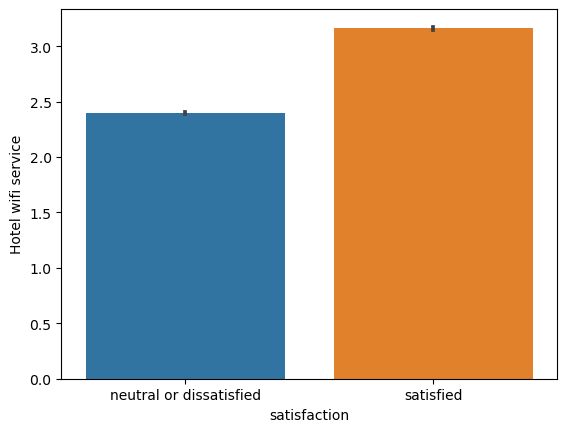

In [14]:
# Exploring the relationship between Hotel wifi service and satisfaction
sns.barplot(x='satisfaction', y='Hotel wifi service', data=df)

The "satisfied" group has a significantly higher rating for hotel Wi-Fi service compared to the "neutral or dissatisfied" group. This suggests that good Wi-Fi service is an important factor contributing to overall customer satisfaction.

<AxesSubplot:xlabel='satisfaction', ylabel='Departure/Arrival  convenience'>

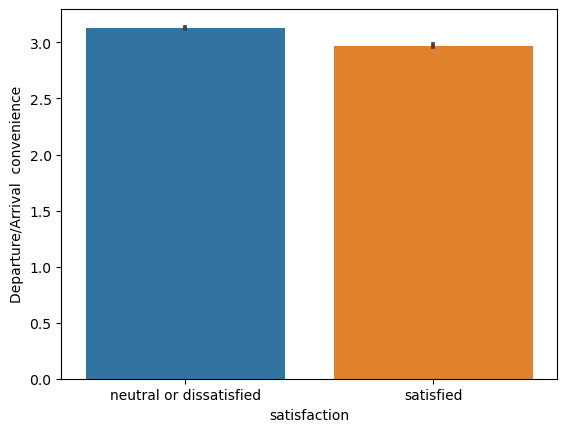

In [15]:
# Exploring the relationship between Departure/Arrival  convenience and satisfaction
sns.barplot(x='satisfaction', y='Departure/Arrival  convenience', data=df)

The departure/arrival convenience has a minimal impact on customer satisfaction, as both groups have nearly identical ratings for this factor.

<AxesSubplot:xlabel='satisfaction', ylabel='Ease of Online booking'>

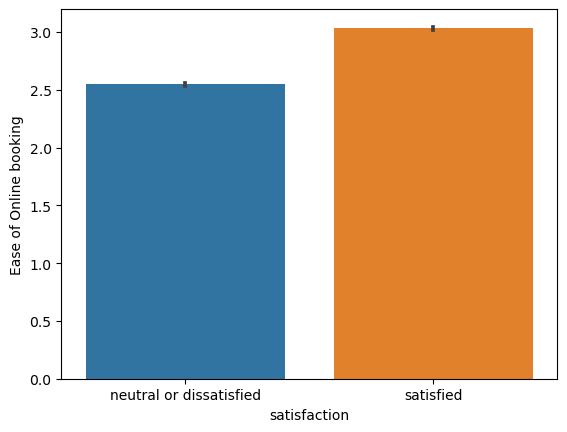

In [16]:
# Exploring the relationship between Ease of Online booking and satisfaction
sns.barplot(x='satisfaction', y='Ease of Online booking', data=df)

The "satisfied" group rates the ease of online booking higher than the "neutral or dissatisfied" group, indicating that customers who found the online booking process easier are more likely to be satisfied overall.

<AxesSubplot:xlabel='satisfaction', ylabel='Hotel location'>

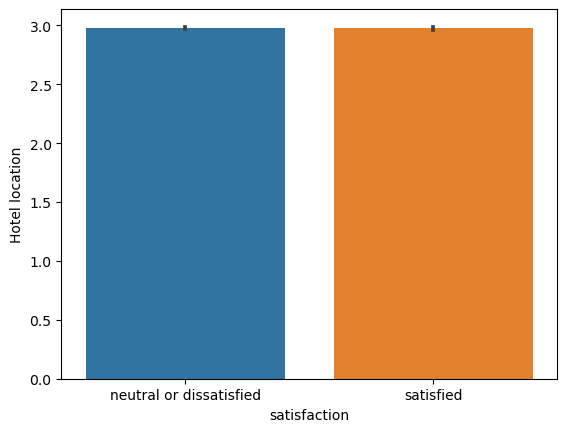

In [17]:
# Exploring the relationship between Hotel location  and satisfaction
sns.barplot(x='satisfaction', y='Hotel location', data=df)

Both "neutral or dissatisfied" and "satisfied" groups rate the hotel location similarly, with almost no noticeable difference between the two. This suggests that hotel location does not significantly impact overall customer satisfaction.

<AxesSubplot:xlabel='satisfaction', ylabel='Food and drink'>

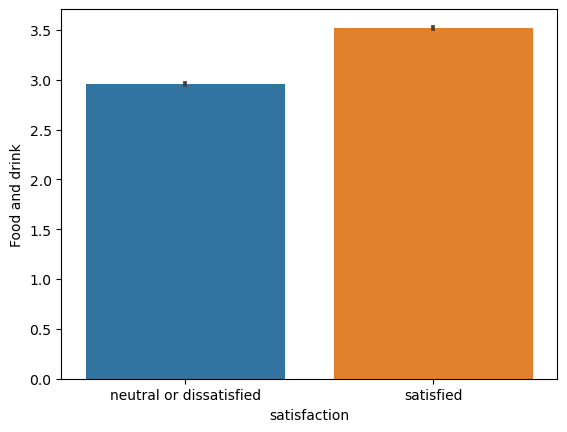

In [18]:
# Exploring the relationship between Food and drink   and satisfaction
sns.barplot(x='satisfaction', y='Food and drink', data=df)

The "satisfied" group has a noticeably higher rating for food and drink quality compared to the "neutral or dissatisfied" group, suggesting that food and drink quality is an important factor in achieving higher customer satisfaction

<AxesSubplot:xlabel='satisfaction', ylabel='Stay comfort'>

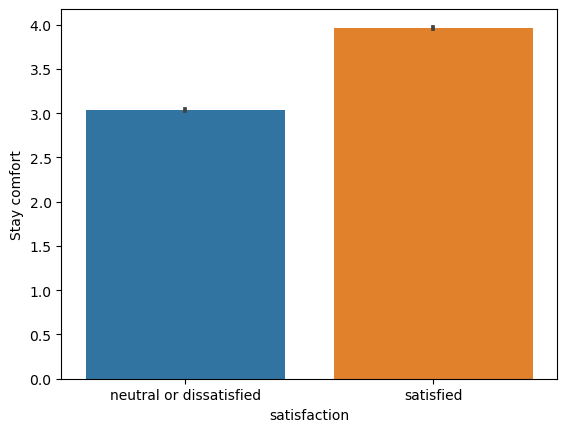

In [19]:
# Exploring the relationship between Food and drink   and satisfaction
sns.barplot(x='satisfaction', y='Stay comfort', data=df)

The "satisfied" group has a noticeably higher rating for stay comfort compared to the "neutral or dissatisfied" group. This indicates that comfort during the stay is a key factor in achieving customer satisfaction.

<AxesSubplot:xlabel='satisfaction', ylabel='Common Room entertainment'>

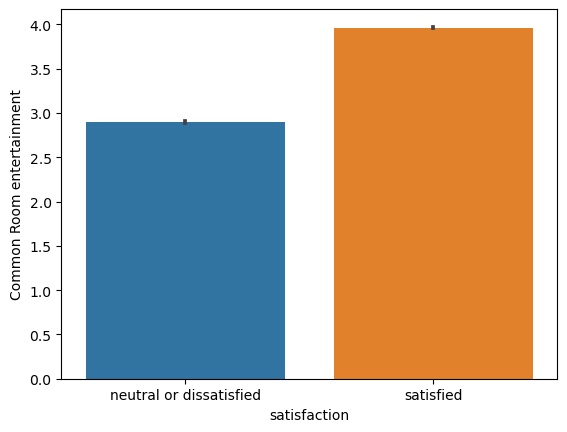

In [20]:
# Exploring the relationship between Food and drink   and satisfaction
sns.barplot(x='satisfaction', y='Common Room entertainment', data=df)

The "satisfied" group rates common room entertainment significantly higher than the "neutral or dissatisfied" group. This suggests that quality entertainment options in common areas contribute positively to customer satisfaction.



<AxesSubplot:xlabel='satisfaction', ylabel='Checkin/Checkout service'>

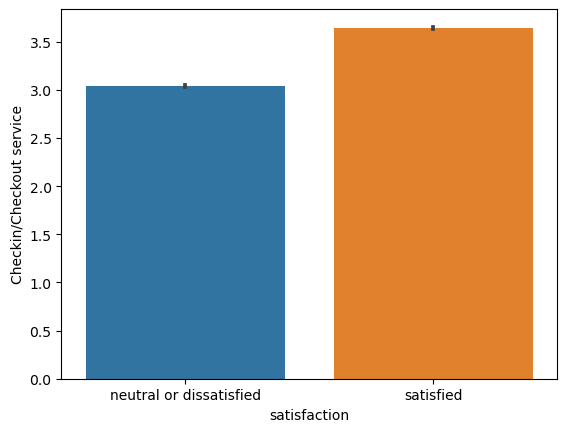

In [21]:
# Exploring the relationship between Checkin/Checkout service  and satisfaction
sns.barplot(x='satisfaction', y='Checkin/Checkout service', data=df)

The "satisfied" group rates the check-in/checkout service noticeably higher than the "neutral or dissatisfied" group. This suggests that a smooth and efficient check-in/checkout process contributes positively to customer satisfaction.

<AxesSubplot:xlabel='satisfaction', ylabel='Cleanliness'>

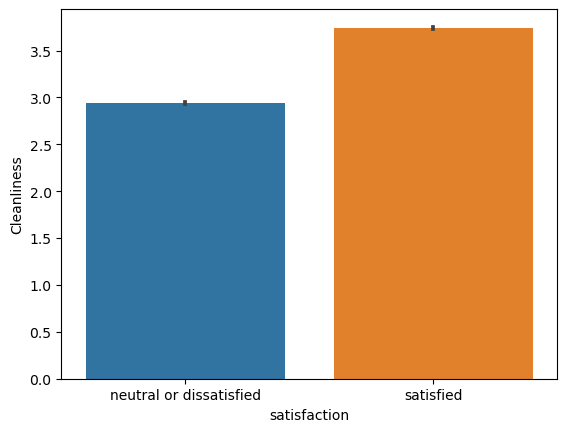

In [22]:
# Exploring the relationship between Cleanliness   and satisfaction
sns.barplot(x='satisfaction', y='Cleanliness', data=df)

The "satisfied" group has a significantly higher rating for cleanliness compared to the "neutral or dissatisfied" group, indicating that cleanliness is a key factor in achieving customer satisfaction

## Multivariate Analysis:Investigating the relationship multiple  variables

In [23]:
# Performing correlations analysis to investigate relationship among the variables

df.corr()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
Age,1.000000,0.017859,0.038125,0.024842,-0.001330,0.023000,0.160277,0.076444,0.035482,-0.049427,0.053611
Hotel wifi service,0.017859,1.000000,0.343845,0.715856,0.336248,0.134718,0.122658,0.209321,0.043193,0.110441,0.132698
Departure/Arrival convenience,0.038125,0.343845,1.000000,0.436961,0.444757,0.004906,0.011344,-0.004861,0.093333,0.073318,0.014292
Ease of Online booking,0.024842,0.715856,0.436961,1.000000,0.458655,0.031873,0.030014,0.047032,0.011081,0.035272,0.016179
Hotel location,-0.001330,0.336248,0.444757,0.458655,1.000000,-0.001159,0.003669,0.003517,-0.035427,0.001681,-0.003830
Food and drink,0.023000,0.134718,0.004906,0.031873,-0.001159,1.000000,0.574556,0.622512,0.087299,0.033993,0.657760
Stay comfort,0.160277,0.122658,0.011344,0.030014,0.003669,0.574556,1.000000,0.610590,0.191854,0.069218,0.678534
Common Room entertainment,0.076444,0.209321,-0.004861,0.047032,0.003517,0.622512,0.610590,1.000000,0.120867,0.404855,0.691815
Checkin/Checkout service,0.035482,0.043193,0.093333,0.011081,-0.035427,0.087299,0.191854,0.120867,1.000000,0.237197,0.179583
Other service,-0.049427,0.110441,0.073318,0.035272,0.001681,0.033993,0.069218,0.404855,0.237197,1.000000,0.088779


Text(0.5, 1.0, 'Correlation Analysis')

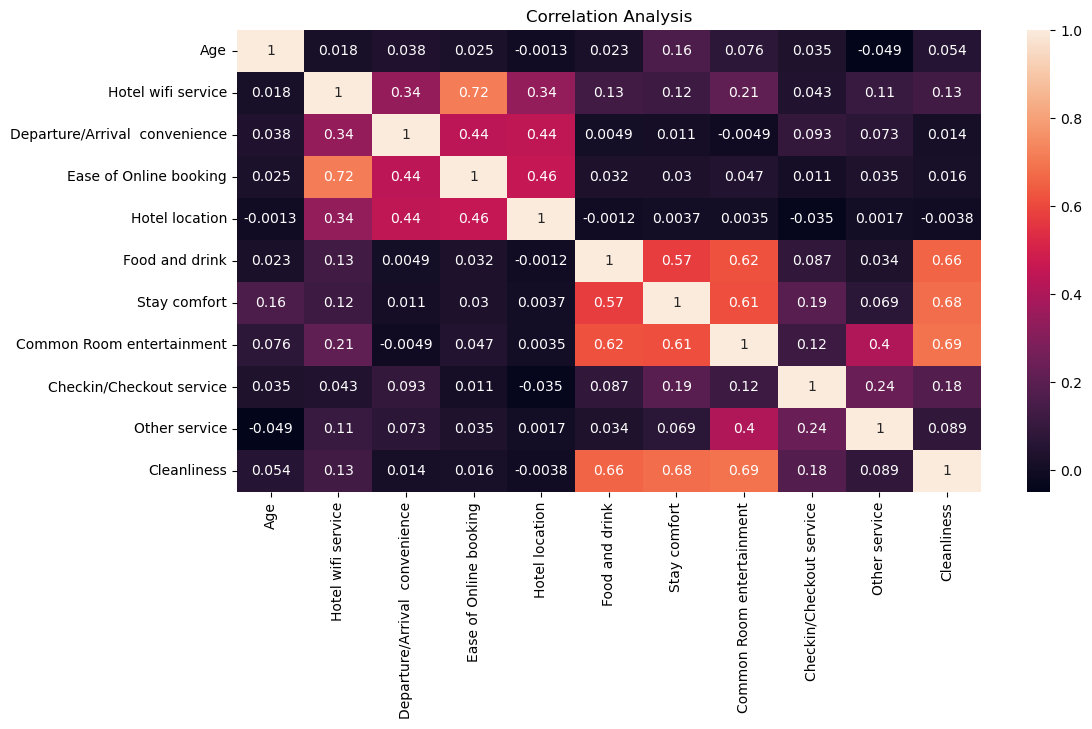

In [24]:
# Visualizing the correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Analysis")

The heatmap reveals that cleanliness, comfort, and entertainment are strongly correlated and central to customer satisfaction, indicating that improvements in these areas can significantly enhance the guest experience. Additionally, Wi-Fi quality is closely linked with ease of online booking, while age has minimal impact on satisfaction factors.

## Data Preprocessing 

####  Next Step after the EDA is the preparation and preprocessing of the data for model building

In [26]:
# Encoding the target variable

df['satisfaction']= df['satisfaction'].replace('neutral or dissatisfied', 0)
df['satisfaction']= df['satisfaction'].replace('satisfied', 1)

In [27]:
# Encoding the categorical variables

cat = ['Gender', 'purpose_of_travel',  'Type of Travel', 'Type Of Booking']

df = pd.get_dummies(df,columns=cat, drop_first=True)

In [28]:
# Splitting the data into dependent and independent variable
X=df.drop('satisfaction', axis=1)
y= df['satisfaction']

In [29]:
# Ensuring the data is balance so the model is not bias in its learning towards the majority class

# Creating sampling object
sm=over_sampling.SMOTE()

# Applying  the sampling object 
X,y=sm.fit_resample(X,y)


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

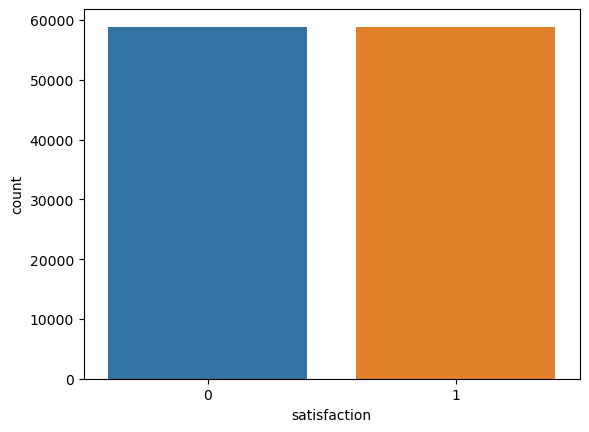

In [30]:
# Visualizing data after to see the balance
sns.countplot(x=y) 

From the graph, our data is now balanced

In [31]:
# Splitting the data into train and testing data - 80% training and 20% testing
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=111)


In [32]:
# Normalizing the data to be on the same scale
scaler =StandardScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

## Feature Importance Selection 